In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('creditcard.csv')

# Check the data
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check the distribution of target variable (Class)
print("\nDistribution of fraud and non-fraud transactions:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions: {:.4f}%".format(df['Class'].value_counts()[1] / len(df) * 100))


Distribution of fraud and non-fraud transactions:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1727%


In [5]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

print(X.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [8]:
# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
# contamination parameter is set to the proportion of fraudulent transactions
yhat = iso_forest.fit_predict(X)

In [10]:
print(yhat)

# Convert predictions: -1 (anomaly) to 1 (fraud), 1 (normal) to 0 (normal)
yhat = np.where(yhat == -1, 1, 0)

print(yhat)

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



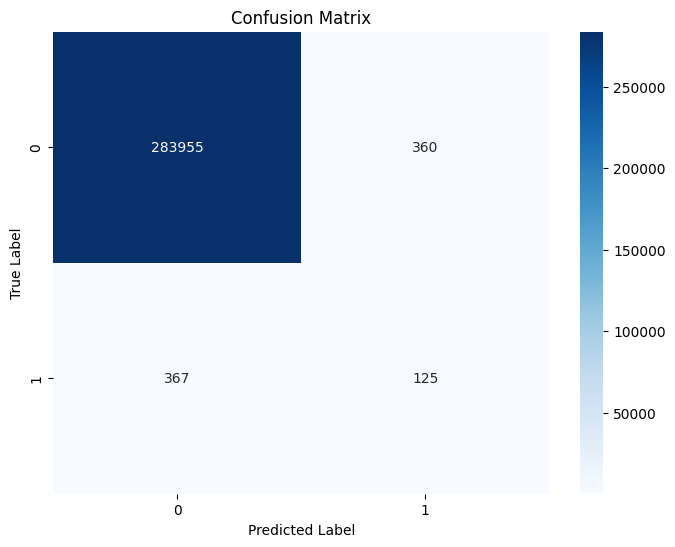

In [11]:
# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y, yhat))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, yhat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

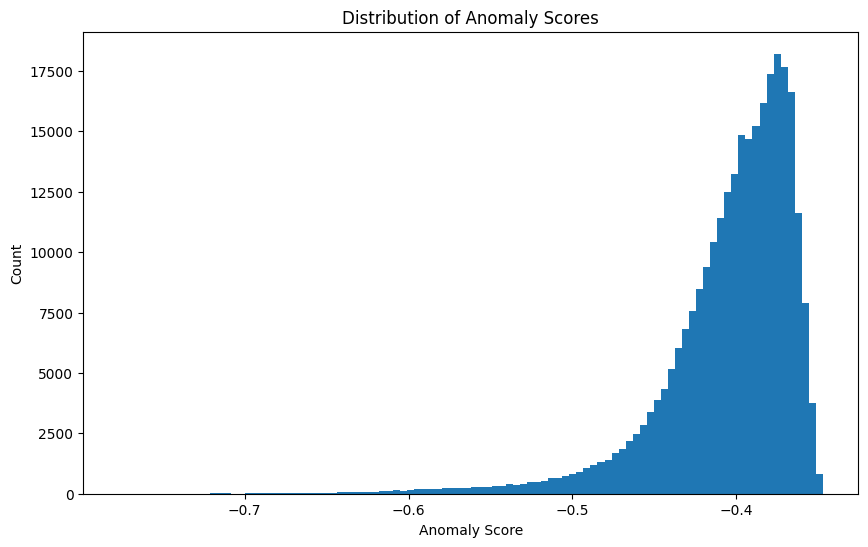

In [13]:
# Examine anomaly score distribution
scores = iso_forest.score_samples(X)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=100)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()

# Add anomaly scores to original dataframe
df['anomaly_score'] = scores

In [14]:
# Examine transactions detected as fraud
fraud_detected = df[yhat == 1]
print("\nNumber of detected fraudulent transactions:", len(fraud_detected))


Number of detected fraudulent transactions: 485


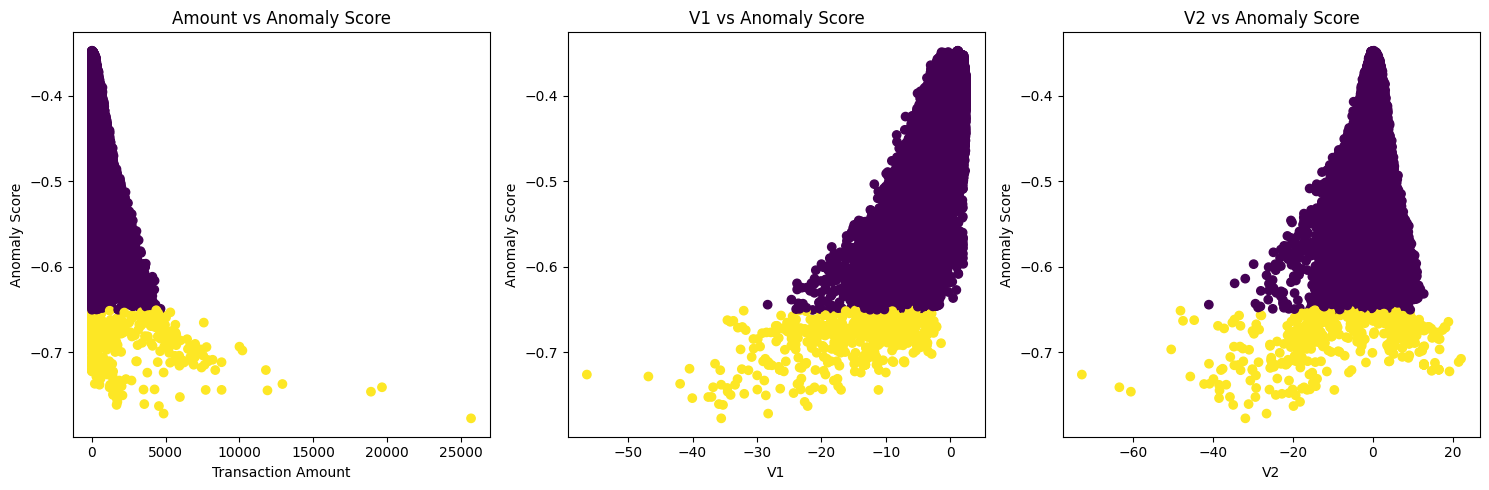

In [15]:
# Visualize distribution of important features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Amount'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Anomaly Score')
plt.title('Amount vs Anomaly Score')

plt.subplot(1, 3, 2)
plt.scatter(df['V1'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('Anomaly Score')
plt.title('V1 vs Anomaly Score')

plt.subplot(1, 3, 3)
plt.scatter(df['V2'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('V2')
plt.ylabel('Anomaly Score')
plt.title('V2 vs Anomaly Score')

plt.tight_layout()
plt.show()